So far, we have mainly concerned with tools to access and operate on array data with NumPy. This section covers algorithms related to sorting values in NumPy arrays. 

For example, a *selection sort* repeatedly finds the minimum value from a list, and makes swaps until the list is sorted. We can code this in just a few lines of Python:

In [3]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [2]:
x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 3, 4, 5])

Selection sort has $O(n^2)$ complexity, which means if the input grow on a factor of 2, the time will expand at a factor of 4

In [4]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

x = np.array([2,1,4,3,5,7,9,14,16])
bogosort(x)

array([ 1,  2,  3,  4,  5,  7,  9, 14, 16])

What this algorithm does is that it keep shuffle randomly until the entire array is sorted, and it has 

# Fast Sorting in Numpy: `np.sort` and `np.argsort`

Python has its own sorting function, but we use `np.sort` and `np.argsort` here

In [ ]:
x = np.array([2,1,4,3,5])
np.sort(x)

In [6]:
# This is when you do it in place
x.sort()
print(x)

[ 1  2  3  4  5  7  9 14 16]


A related function is `argsort`, which instead returns the *indices* of the sortedd elements:

In [7]:
x = np.array([2,1,4,3,5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on.

**Question:** Using fancy indexing, how do we convert a argsort result into a sort result?

## Sorting along rows or columns

In [4]:
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


**Question:** How do you sort along row or column?

# Partial Sorts: Partitioning

Sometimes we are not interested in sorting the entire array, but simply want to find the k smallest values in the array. Numpy provides this in the `np.partition` funciton

In [5]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

In [6]:
# How to partition along column direction or row direction?

Similar to `sort` and `argsort`; for `partition`, we also have `argpartition`. We will see this in action in the next example

# Example: k-Nearest Neighbors

Let's quickly see how see we might use this `argsort` function along multiple axes to find the nearest neighbors of each point in a set. We start by creating a random set of 10 points on a 2d plane. 

In [12]:
X = rand.rand(10,2)

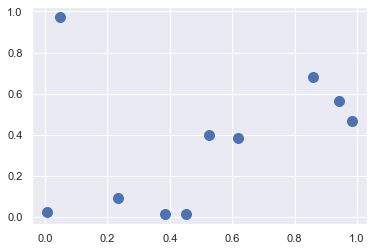

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0], X[:,1], s=100)

Now we will compute distance between each pair of points. The square distance between two point x,y is:

$$
dist(x,y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}
$$

Then, using broadcasting and aggregation, we can write a one-liner to calculate the square distance between each points

In [14]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis,:,:]) ** 2, axis=-1)

To break it down:

In [15]:
# for each pair of points, compute differences in their coordinates
differences = X[:,np.newaxis,:]

In [16]:
differences = X[:,np.newaxis,:] - X[np.newaxis,:,:]
differences.shape

(10, 10, 2)

In [19]:
sq_difference = differences ** 2
sq_difference.shape

(10, 10, 2)

In [51]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_difference.sum(2) # -1 means to sum across the last axis, 
dist_sq.shape

(10, 10)

In [24]:
# what does entries on the diagonal mean?
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**Question:** Once we have the distance calculated, how should we find the closest neighbor for each point in the dataset?

In [52]:
np.argsort(dist_sq, axis=1)

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]], dtype=int64)

**Question:** What if we want to find k nearest neighbors of a point? What function should we use? 

In [53]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis = 1)

In [54]:
nearest_partition

array([[3, 0, 9, 7, 1, 4, 2, 5, 8, 6],
       [1, 4, 7, 9, 3, 5, 6, 2, 8, 0],
       [2, 1, 4, 6, 3, 0, 5, 7, 8, 9],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4],
       [1, 8, 4, 5, 7, 6, 9, 3, 2, 0],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 5, 6, 2, 8, 0],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4]], dtype=int64)

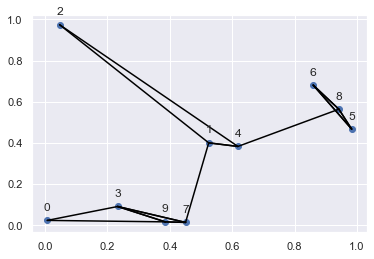

In [57]:
plt.scatter(X[:,0], X[:,1])
for i in range(X.shape[0]):
    x,y = X[i,0], X[i,1]
    label = str(i)
    plt.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,10),
                ha="center")
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

# Aside: Big O Notation

Big-O notation, in this loose sense, tells you how much time your algorithm will take as you increase the amount of data. If you have an $\mathcal{O}[N]$ (read "order $N$") algorithm that takes 1 second to operate on a list of length N=1,000, then you should expect it to take roughly 5 seconds for a list of length N=5,000. If you have an $\mathcal{O}[N^2]$ (read "order N squared") algorithm that takes 1 second for N=1000, then you should expect it to take about 25 seconds for N=5000.